In [1]:
# coding: utf-8
"""
PRML1章の可視化
"""
import matplotlib.pyplot as plt
import numpy as np
import seaborn

% pylab inline

Populating the interactive namespace from numpy and matplotlib


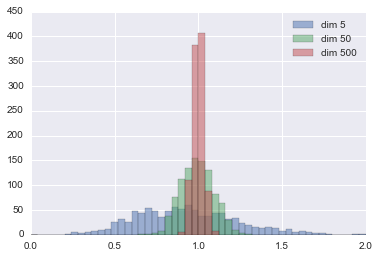

In [2]:
# 球面集中現象の可視化

mu = 0
sigma = 1

def cal_distances(dimention, mu, sigma, num_samples):

    base = np.zeros(dimention)
    samples = [np.random.normal(mu, sigma, dimention) for _ in range(num_samples)]
    euclideans = [np.linalg.norm(base - sample) / np.sqrt(dimention) for sample in samples]
    
    return euclideans

euclideans5 = cal_distances(
    dimention=5,
    mu=0,
    sigma=1,
    num_samples=1000
)

euclideans50 = cal_distances(
    dimention=50,
    mu=0,
    sigma=1,
    num_samples=1000
)

euclideans500 = cal_distances(
    dimention=500,
    mu=0,
    sigma=1,
    num_samples=1000
)

plt.hist(euclideans5, bins=50, alpha=0.5, range=(0, 2), label='dim 5')
plt.hist(euclideans50, bins=50, alpha=0.5,  range=(0, 2), label='dim 50')
plt.hist(euclideans500, bins=50, alpha=0.5,  range=(0, 2), label='dim 500')
plt.legend()
plt.show()

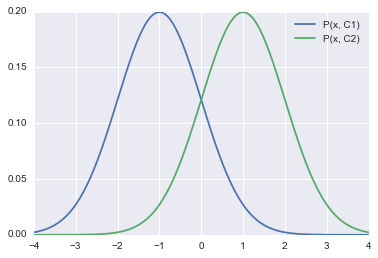

In [3]:
# 　正規分布の可視化(バランス)

mu1 = -1
sigma1 = 1
mu2 = 1
sigma2 = 1

weight=0.5

xs = [i/100 for i in range(-400, 400)]

def gaussian(x, mu, sigma):
    return (1/sqrt(2*np.pi*sigma)*exp(-1*(x - mu)**2/(2*sigma)) )

ys1 = [gaussian(x, mu1, sigma1)*weight for x in xs]
ys2 = [gaussian(x, mu2, sigma2)*(1 - weight) for x in xs]

plt.plot(xs, ys1, label='P(x, C1)')
plt.plot(xs, ys2, label='P(x, C2)')
plt.legend()
plt.show()

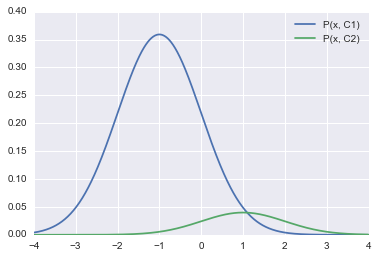

In [4]:
# 　正規分布の可視化（アンバランス）

mu1 = -1
sigma1 = 1
mu2 = 1
sigma2 = 1

weight=0.9

xs = [i/100 for i in range(-400, 400)]

def gaussian(x, mu, sigma):
    return (1/sqrt(2*np.pi*sigma)*exp(-1*(x - mu)**2/(2*sigma)) )

ys1 = [gaussian(x, mu1, sigma1)*weight for x in xs]
ys2 = [gaussian(x, mu2, sigma2)*(1 - weight) for x in xs]

plt.plot(xs, ys1, label='P(x, C1)')
plt.plot(xs, ys2, label='P(x, C2)')
plt.legend()
plt.show()

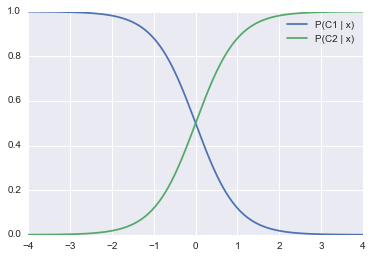

In [5]:
# 事後確率の可視化

mu1 = -1
sigma1 = 1
mu2 = 1
sigma2 = 1

weight=0.5

xs = [i/100 for i in range(-400, 400)]

def gaussian(x, mu, sigma):
    return (1/sqrt(2*np.pi*sigma)*exp(-1*(x - mu)**2/(2*sigma)) )

ys1 = [gaussian(x, mu1, sigma1)*weight for x in xs]
ys2 = [gaussian(x, mu2, sigma2)*(1 - weight) for x in xs]

posterior_ys1 = [y1/ (y1+y2) for y1, y2 in zip(ys1, ys2)]
posterior_ys2 = [y2/ (y1+y2) for y1, y2 in zip(ys1, ys2)]

plt.plot(xs, posterior_ys1, label='P(C1 | x)')
plt.plot(xs, posterior_ys2, label='P(C2 | x)')
plt.legend()
plt.show()

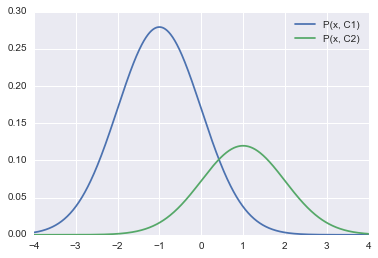

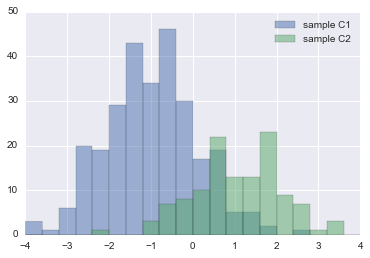

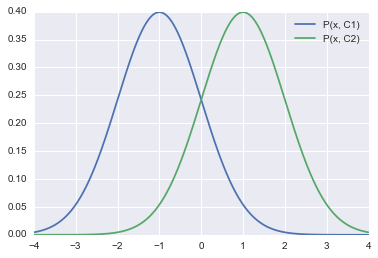

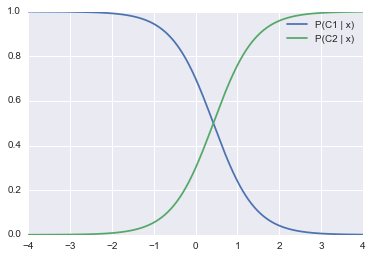

In [6]:
# 同時確率 & 条件付き確率 & 事後確率の可視化

mu1 = -1
sigma1 = 1
mu2 = 1
sigma2 = 1

weight=0.7

xs = [i/100 for i in range(-400, 400)]

def gaussian(x, mu, sigma):
    return (1/sqrt(2*np.pi*sigma)*exp(-1*(x - mu)**2/(2*sigma)) )

joint_ys1 = [gaussian(x, mu1, sigma1)*weight for x in xs]
joint_ys2 = [gaussian(x, mu2, sigma2)*(1-weight) for x in xs]

conditional_ys1 = [gaussian(x, mu1, sigma1) for x in xs]
conditional_ys2 = [gaussian(x, mu2, sigma2) for x in xs]

sample_ys1 = np.random.choice(xs, 280, p=conditional_ys1/np.sum(conditional_ys1))
sample_ys2 = np.random.choice(xs, 120, p=conditional_ys2/np.sum(conditional_ys2))

posterior_ys1 = [y1/ (y1+y2) for y1, y2 in zip(joint_ys1, joint_ys2)]
posterior_ys2 = [y2/ (y1+y2) for y1, y2 in zip(joint_ys1, joint_ys2)]

plt.plot(xs, joint_ys1, label='P(x, C1)')
plt.plot(xs, joint_ys2, label='P(x, C2)')
plt.legend()
plt.show()

plt.hist(sample_ys1, bins=20, range=(-4, 4), alpha=0.5, label='sample C1')
plt.hist(sample_ys2, bins=20, range=(-4, 4), alpha=0.5, label='sample C2')
plt.legend()
plt.show()

plt.plot(xs, conditional_ys1, label='P(x, C1)')
plt.plot(xs, conditional_ys2, label='P(x, C2)')
plt.legend()
plt.show()

plt.plot(xs, posterior_ys1, label='P(C1 | x)')
plt.plot(xs, posterior_ys2, label='P(C2 | x)')
plt.legend()
plt.show()

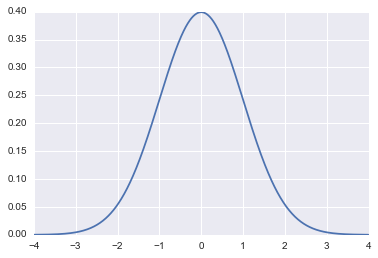

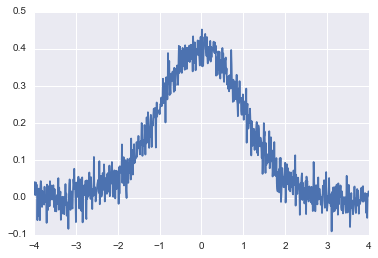

In [7]:
# カルバックライブラー用の分布

mu=0
sigma=1
noise_mu = 0
noise_sigma = 3
weight=0.01

xs = [i/100 for i in range(-400, 400)]

def gaussian(x, mu, sigma):
    return (1/sqrt(2*np.pi*sigma)*exp(-1*(x - mu)**2/(2*sigma)) )

ys = [gaussian(x, mu, sigma) for x in xs]
noised_ys = [gaussian(x, mu, sigma) + np.random.normal(noise_mu, noise_sigma)*weight for x in xs]

plt.plot(xs, ys)
plt.show()
plt.plot(xs, noised_ys)
plt.show()